<a href="https://colab.research.google.com/github/zainulabidin73622/DEEP_LEARNING/blob/main/Final%20performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Network configuration
input_size = 2
hidden1_size = 2
hidden2_size = 2
output_size = 2

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden1_size)
b1 = np.zeros((1, hidden1_size))
W2 = np.random.randn(hidden1_size, hidden2_size)
b2 = np.zeros((1, hidden2_size))
W3 = np.random.randn(hidden2_size, output_size)
b3 = np.zeros((1, output_size))

print("Initial W1:\n", W1)
print("Initial b1:\n", b1)

Initial W1:
 [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]]
Initial b1:
 [[0. 0.]]


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Test the activation function
test_input = np.array([0.5, -0.3])
print("Sigmoid of", test_input, "is", sigmoid(test_input))

Sigmoid of [ 0.5 -0.3] is [0.62245933 0.42555748]


In [3]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    # Hidden layer 1
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    # Hidden layer 2
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Output layer
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)

    return z1, a1, z2, a2, z3, a3

# Test forward propagation
X = np.array([[0.5, 0.8]])  # Input sample
z1, a1, z2, a2, z3, a3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
print("\nForward Propagation Results:")
print("Hidden Layer 1 - Weighted Sum (z1):", z1)
print("Hidden Layer 1 - Activation (a1):", a1)
print("Hidden Layer 2 - Weighted Sum (z2):", z2)
print("Hidden Layer 2 - Activation (a2):", a2)
print("Output Layer - Weighted Sum (z3):", z3)
print("Output Layer - Activation (a3):", a3)


Forward Propagation Results:
Hidden Layer 1 - Weighted Sum (z1): [[0.76650791 1.14929173]]
Hidden Layer 1 - Activation (a1): [[0.682765   0.75938153]]
Hidden Layer 2 - Weighted Sum (z2): [[1.03935331 0.42291524]]
Hidden Layer 2 - Activation (a2): [[0.73872521 0.60418063]]
Output Layer - Weighted Sum (z3): [[-0.62680056  0.11941788]]
Output Layer - Activation (a3): [[0.34823636 0.52981904]]


In [4]:
def compute_error(y, output):
    # Mean squared error
    return 0.5 * np.mean((y - output) ** 2)

# Target output
y = np.array([[0.2, 0.9]])
error = compute_error(y, a3)
print("\nInitial Error:", error)


Initial Error: 0.03975198947520796


In [5]:
def backward_propagation(X, y, z1, a1, z2, a2, z3, a3, W1, W2, W3, b1, b2, b3, learning_rate):
    # Calculate output layer error
    error_output = y - a3
    delta3 = error_output * sigmoid_derivative(a3)

    # Calculate hidden layer 2 error
    error2 = delta3.dot(W3.T)
    delta2 = error2 * sigmoid_derivative(a2)

    # Calculate hidden layer 1 error
    error1 = delta2.dot(W2.T)
    delta1 = error1 * sigmoid_derivative(a1)

    # Update weights and biases
    W3 += learning_rate * a2.T.dot(delta3)
    b3 += learning_rate * np.sum(delta3, axis=0, keepdims=True)
    W2 += learning_rate * a1.T.dot(delta2)
    b2 += learning_rate * np.sum(delta2, axis=0, keepdims=True)
    W1 += learning_rate * X.T.dot(delta1)
    b1 += learning_rate * np.sum(delta1, axis=0, keepdims=True)

    return W1, b1, W2, b2, W3, b3, delta1, delta2, delta3

# Test backward propagation
learning_rate = 0.1
W1, b1, W2, b2, W3, b3, delta1, delta2, delta3 = backward_propagation(
    X, y, z1, a1, z2, a2, z3, a3, W1, W2, W3, b1, b2, b3, learning_rate)

print("\nBackpropagation Results:")
print("Delta Output Layer:", delta3)
print("Delta Hidden Layer 2:", delta2)
print("Delta Hidden Layer 1:", delta1)
print("\nUpdated W1:\n", W1)
print("Updated b1:\n", b1)
print("Updated W2:\n", W2)
print("Updated b2:\n", b2)
print("Updated W3:\n", W3)
print("Updated b3:\n", b3)


Backpropagation Results:
Delta Output Layer: [[-0.03364488  0.09221608]]
Delta Hidden Layer 2: [[ 0.01270551 -0.00654212]]
Delta Hidden Layer 1: [[-0.00031261  0.00274887]]

Updated W1:
 [[ 0.49669852 -0.13812686]
 [ 0.64766353  1.52324977]]
Updated b1:
 [[-3.12611385e-05  2.74886860e-04]]
Updated W2:
 [[-0.23328589 -0.23458363]
 [ 1.58017765  0.76693793]]
Updated b2:
 [[ 0.00127055 -0.00065421]]
Updated W3:
 [[-0.47195982  0.54937228]
 [-0.46545045 -0.46015824]]
Updated b3:
 [[-0.00336449  0.00922161]]



Epoch 0: Error = 0.038816
Output Activations: [[0.34675379 0.534313  ]]

Epoch 100: Error = 0.006005
Output Activations: [[0.26078474 0.75742982]]

Epoch 200: Error = 0.001884
Output Activations: [[0.22945642 0.81834869]]

Epoch 300: Error = 0.000801
Output Activations: [[0.21528622 0.84548612]]

Epoch 400: Error = 0.000401
Output Activations: [[0.20814678 0.86076582]]

Epoch 500: Error = 0.000222
Output Activations: [[0.20435647 0.87050249]]

Epoch 600: Error = 0.000131
Output Activations: [[0.20229559 0.87718976]]

Epoch 700: Error = 0.000081
Output Activations: [[0.20116684 0.88201573]]

Epoch 800: Error = 0.000052
Output Activations: [[0.20055137 0.88562123]]

Epoch 900: Error = 0.000034
Output Activations: [[0.20022097 0.88838373]]


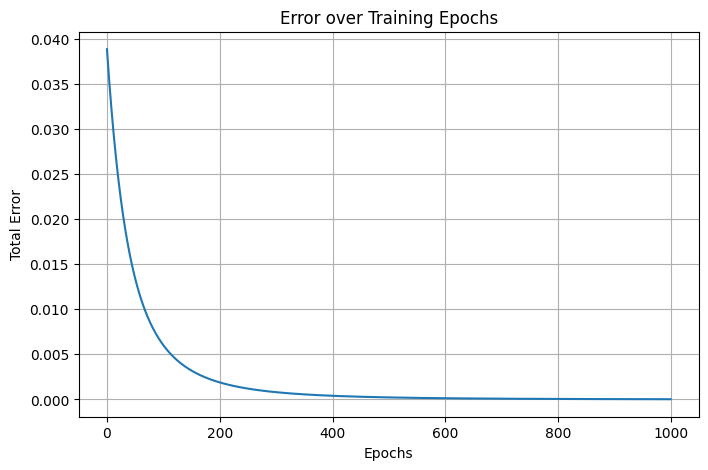

In [6]:
def train_network(X, y, epochs=1000, learning_rate=0.1, verbose=True):
    global W1, b1, W2, b2, W3, b3

    errors = []

    for epoch in range(epochs):
        # Forward propagation
        z1, a1, z2, a2, z3, a3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)

        # Compute error
        error = compute_error(y, a3)
        errors.append(error)

        # Backward propagation
        W1, b1, W2, b2, W3, b3, _, _, _ = backward_propagation(
            X, y, z1, a1, z2, a2, z3, a3, W1, W2, W3, b1, b2, b3, learning_rate)

        # Print intermediate values
        if verbose and epoch % (epochs//10) == 0:
            print(f"\nEpoch {epoch}: Error = {error:.6f}")
            print("Output Activations:", a3)

    # Plot the error over epochs
    plt.figure(figsize=(8, 5))
    plt.plot(range(epochs), errors)
    plt.title('Error over Training Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.grid(True)
    plt.show()

    return errors

# Train the network
errors = train_network(X, y, epochs=1000, learning_rate=0.1)

In [7]:
# After training, evaluate the final performance
z1, a1, z2, a2, z3, a3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
final_error = compute_error(y, a3)

print("\nFinal Results:")
print("Target Output:", y)
print("Predicted Output:", a3)
print("Final Error:", final_error)
print("\nFinal Weights and Biases:")
print("W1:\n", W1)
print("b1:\n", b1)
print("W2:\n", W2)
print("b2:\n", b2)
print("W3:\n", W3)
print("b3:\n", b3)


Final Results:
Target Output: [[0.2 0.9]]
Predicted Output: [[0.20004888 0.89054078]]
Final Error: 2.2369803324179315e-05

Final Weights and Biases:
W1:
 [[ 0.49299262 -0.10975178]
 [ 0.64173409  1.56864989]]
b1:
 [[-0.00744307  0.05702504]]
W2:
 [[-0.10445651 -0.22823067]
 [ 1.72550697  0.77434448]]
b2:
 [[0.19037015 0.0087201 ]]
W3:
 [[-0.74822449  1.29447542]
 [-0.6809792   0.11986684]]
b3:
 [[-0.36159658  0.97185233]]
